### Data Understanding and EDA

In [1]:
import os
os.chdir('..')
import scripts.utils as utils
import scripts.insurance_data_analysis as insurance_data_analysis

Loading the data

In [2]:

os.getcwd()


'/home/musse/Documents/Tenx/kaim-week-3'

In [3]:
df = utils.load_data("data/MachineLearningRating_v3.txt")

/home/musse/Documents/Tenx/kaim-week-3/scripts/utils.py:15: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_file, delimiter='|') # Delimeter


File successfully converted and saved as ../data/MachineLearningRating_v3.csv


In [4]:
df.head(5)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
df.shape

(1000098, 52)

Cheking for null values

In [6]:
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

It is best to drop the Bank and AccountType columns as they are not needed for the analysis and they have many missing values.

In [7]:
df.drop(columns=['Bank', 'AccountType'], inplace=True)

Lets take a closer look at other columns that have missing values

In [8]:
print(f"MaritalStatus column has {df['MaritalStatus'].isnull().sum()} missing values")
df['MaritalStatus'].unique()
df['MaritalStatus'].value_counts()

MaritalStatus column has 8259 missing values


MaritalStatus
Not specified    986208
Single             4254
Married            1377
Name: count, dtype: int64

In [9]:
print(f"Gender column has {df['Gender'].isnull().sum()} missing values")
df['Gender'].unique()
df['Gender'].value_counts()

Gender column has 9536 missing values


Gender
Not specified    940990
Male              42817
Female             6755
Name: count, dtype: int64

But since we will need both gender and marital status, we will need to change the null values to 'Not Specified'.

In [10]:
df['MaritalStatus'] = df['MaritalStatus'].fillna('Not specified')
df['Gender'] = df['Gender'].fillna('Not specified')
df.isnull().sum()

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors                   552
VehicleIntroDate                552
CustomValueEstimate         

In [11]:
df.isnull().sum()[df.isnull().sum() > 0]

mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

As we can see above, all the missing values are from the columns about the car insured. In this case, we will drop all the rows with missing values less than 1000.

In [12]:
df.dropna(subset=['mmcode', 'VehicleType', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts','bodytype', 'NumberOfDoors', 'VehicleIntroDate','CapitalOutstanding' ], inplace=True)

And we will drop the other columns that are not needed for the analysis.

In [13]:
df.drop(columns=['NewVehicle', 'CustomValueEstimate', 'WrittenOff', 'NewVehicle', 'Rebuilt', 'Converted', 'CrossBorder','NumberOfVehiclesInFleet'], inplace=True)

In [14]:
df.isnull().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
SumInsured                  0
TermFrequency               0
CalculatedPremiumPerTerm    0
ExcessSele

In [15]:
df.columns


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate',
       'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [16]:
df['Province'].unique()

array(['Gauteng', 'KwaZulu-Natal', 'Mpumalanga', 'Eastern Cape',
       'Western Cape', 'Limpopo', 'North West', 'Free State',
       'Northern Cape'], dtype=object)

In [17]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,999544.000000,999544.000000,999544.000000,9.995440e+05,999544.000000,999544.000000,999544.000000,999544.000000,999544.000000,9.995440e+05,999544.000000,999544.000000,999544.000000
mean,104805.651873,7956.004267,3019.836643,5.487769e+07,2010.224983,4.046642,2466.743461,97.207964,4.019250,6.038605e+05,116.161425,61.372350,64.340199
std,63297.157788,5290.000123,2649.389643,1.360382e+07,3.261203,0.294020,442.801023,19.393250,0.468315,1.507329e+06,220.576166,157.014098,2369.567085
min,1.000000,14.000000,1.000000,4.041200e+06,1987.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-02,0.000000,-782.576754,-12002.412281
25%,55128.000000,4500.000000,821.000000,6.005692e+07,2008.000000,4.000000,2237.000000,75.000000,4.000000,5.000000e+03,3.225700,0.000000,0.000000
50%,94073.000000,7071.000000,2000.000000,6.005842e+07,2011.000000,4.000000,2694.000000,111.000000,4.000000,7.500000e+03,8.436900,2.179737,0.000000
75%,139190.000000,11077.000000,4171.000000,6.005842e+07,2013.000000,4.000000,2694.000000,111.000000,4.000000,2.500000e+05,90.000000,21.929825,0.000000
max,301175.000000,23246.000000,9870.000000,6.506535e+07,2015.000000,10.000000,12880.000000,309.000000,6.000000,1.000000e+07,3051.821100,2253.507281,393092.105263


As we can observe above, the data has negative values for the TotalPremium and TotalClaims columns. We will need to investigate this further.

In [18]:
print("\nNumber of negative values in TotalPremium:", len(df[df['TotalPremium'] < 0]))
df['TotalPremium'].describe()
df[df['TotalPremium'] < 0]['TotalPremium'].unique()


Number of negative values in TotalPremium: 286


array([-4.26065163e+01, -4.51127820e+01, -2.49009621e+01, -5.85738540e+01,
       -8.04093567e+01, -3.65497076e+01, -3.07017544e+00, -5.71637427e+01,
       -3.21637427e+00, -6.05263158e+01, -3.94736842e+01, -2.54668930e+00,
       -2.77777778e+01, -4.29824561e+01, -3.80116959e+01, -6.84210526e+01,
       -6.46198830e+01, -6.76691729e+01, -6.39097744e+01, -9.21052632e+01,
       -9.64912281e+01, -7.89473684e+01, -4.82456140e+01, -4.60526316e+01,
       -2.84497807e+02, -2.54668930e+01, -7.01403509e+00, -1.57894737e+01,
       -7.60747029e-01, -1.96526316e+00, -3.93043860e+00, -5.89578947e+00,
       -3.05602716e+01, -1.34583033e+01, -2.33807018e+00, -4.67596491e+00,
       -3.02932937e+02, -7.82576754e+02, -5.75579649e+02, -1.14111036e+02,
       -2.94786842e+02, -6.11205433e+00, -2.71511036e+00, -1.69779287e+01,
       -4.38596491e+01, -3.50701491e+02, -1.52146010e+00, -2.28224109e+00,
       -2.22805025e+02, -1.35755416e+02, -9.05059423e-01, -1.81005093e+00])

In [19]:
print("\nNumber of negative values in TotalClaims:", len(df[df['TotalClaims'] < 0]))
df['TotalClaims'].describe()
df[df['TotalClaims'] < 0]['TotalClaims'].unique()


Number of negative values in TotalClaims: 5


array([  -635.48      ,   -256.35      , -12002.4122807 ,  -5690.71929825,
          -72.        ])

In order not to complicate the analysis, we will drop the rows with negative values for the TotalPremium and TotalClaims columns.

In [20]:
df.drop(df[df['TotalPremium'] < 0].index, inplace=True)

In [21]:
df.drop(df[df['TotalClaims'] < 0].index, inplace=True)

In [22]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,999253.000000,999253.000000,999253.000000,9.992530e+05,999253.000000,999253.000000,999253.000000,999253.000000,999253.000000,9.992530e+05,999253.000000,999253.000000,999253.000000
mean,104829.875293,7957.823061,3019.439475,5.488212e+07,2010.224674,4.046653,2466.737279,97.206250,4.019259,6.038895e+05,116.155039,61.420516,64.377607
std,63282.355095,5289.103997,2649.598272,1.359715e+07,3.261510,0.294058,442.838372,19.394867,0.468374,1.507362e+06,220.573433,156.974271,2369.873974
min,1.000000,14.000000,1.000000,4.041200e+06,1987.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-02,0.000000,0.000000,0.000000
25%,55150.000000,4500.000000,812.000000,6.005692e+07,2008.000000,4.000000,2237.000000,75.000000,4.000000,5.000000e+03,3.225700,0.000000,0.000000
50%,94087.000000,7071.000000,2000.000000,6.005842e+07,2011.000000,4.000000,2694.000000,111.000000,4.000000,7.500000e+03,8.436900,2.180175,0.000000
75%,139193.000000,11079.000000,4171.000000,6.005842e+07,2013.000000,4.000000,2694.000000,111.000000,4.000000,2.500000e+05,90.000000,21.929825,0.000000
max,301175.000000,23246.000000,9870.000000,6.506535e+07,2015.000000,10.000000,12880.000000,309.000000,6.000000,1.000000e+07,3051.821100,2253.507281,393092.105263


Dealing with outliers

In [ ]:
observe outliers in TotalPremium and TotalClaims
using boxplots


#### Univariate Analysis

Let's do some univariate analysis on the columns that are categorical.

In [23]:
df.head(3)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,MaritalStatus,Gender,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,Not specified,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,Not specified,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,Not specified,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


array([[<Axes: title={'center': 'UnderwrittenCoverID'}>,
        <Axes: title={'center': 'PolicyID'}>,
        <Axes: title={'center': 'PostalCode'}>,
        <Axes: title={'center': 'mmcode'}>],
       [<Axes: title={'center': 'RegistrationYear'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'cubiccapacity'}>,
        <Axes: title={'center': 'kilowatts'}>],
       [<Axes: title={'center': 'NumberOfDoors'}>,
        <Axes: title={'center': 'SumInsured'}>,
        <Axes: title={'center': 'CalculatedPremiumPerTerm'}>,
        <Axes: title={'center': 'TotalPremium'}>],
       [<Axes: title={'center': 'TotalClaims'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

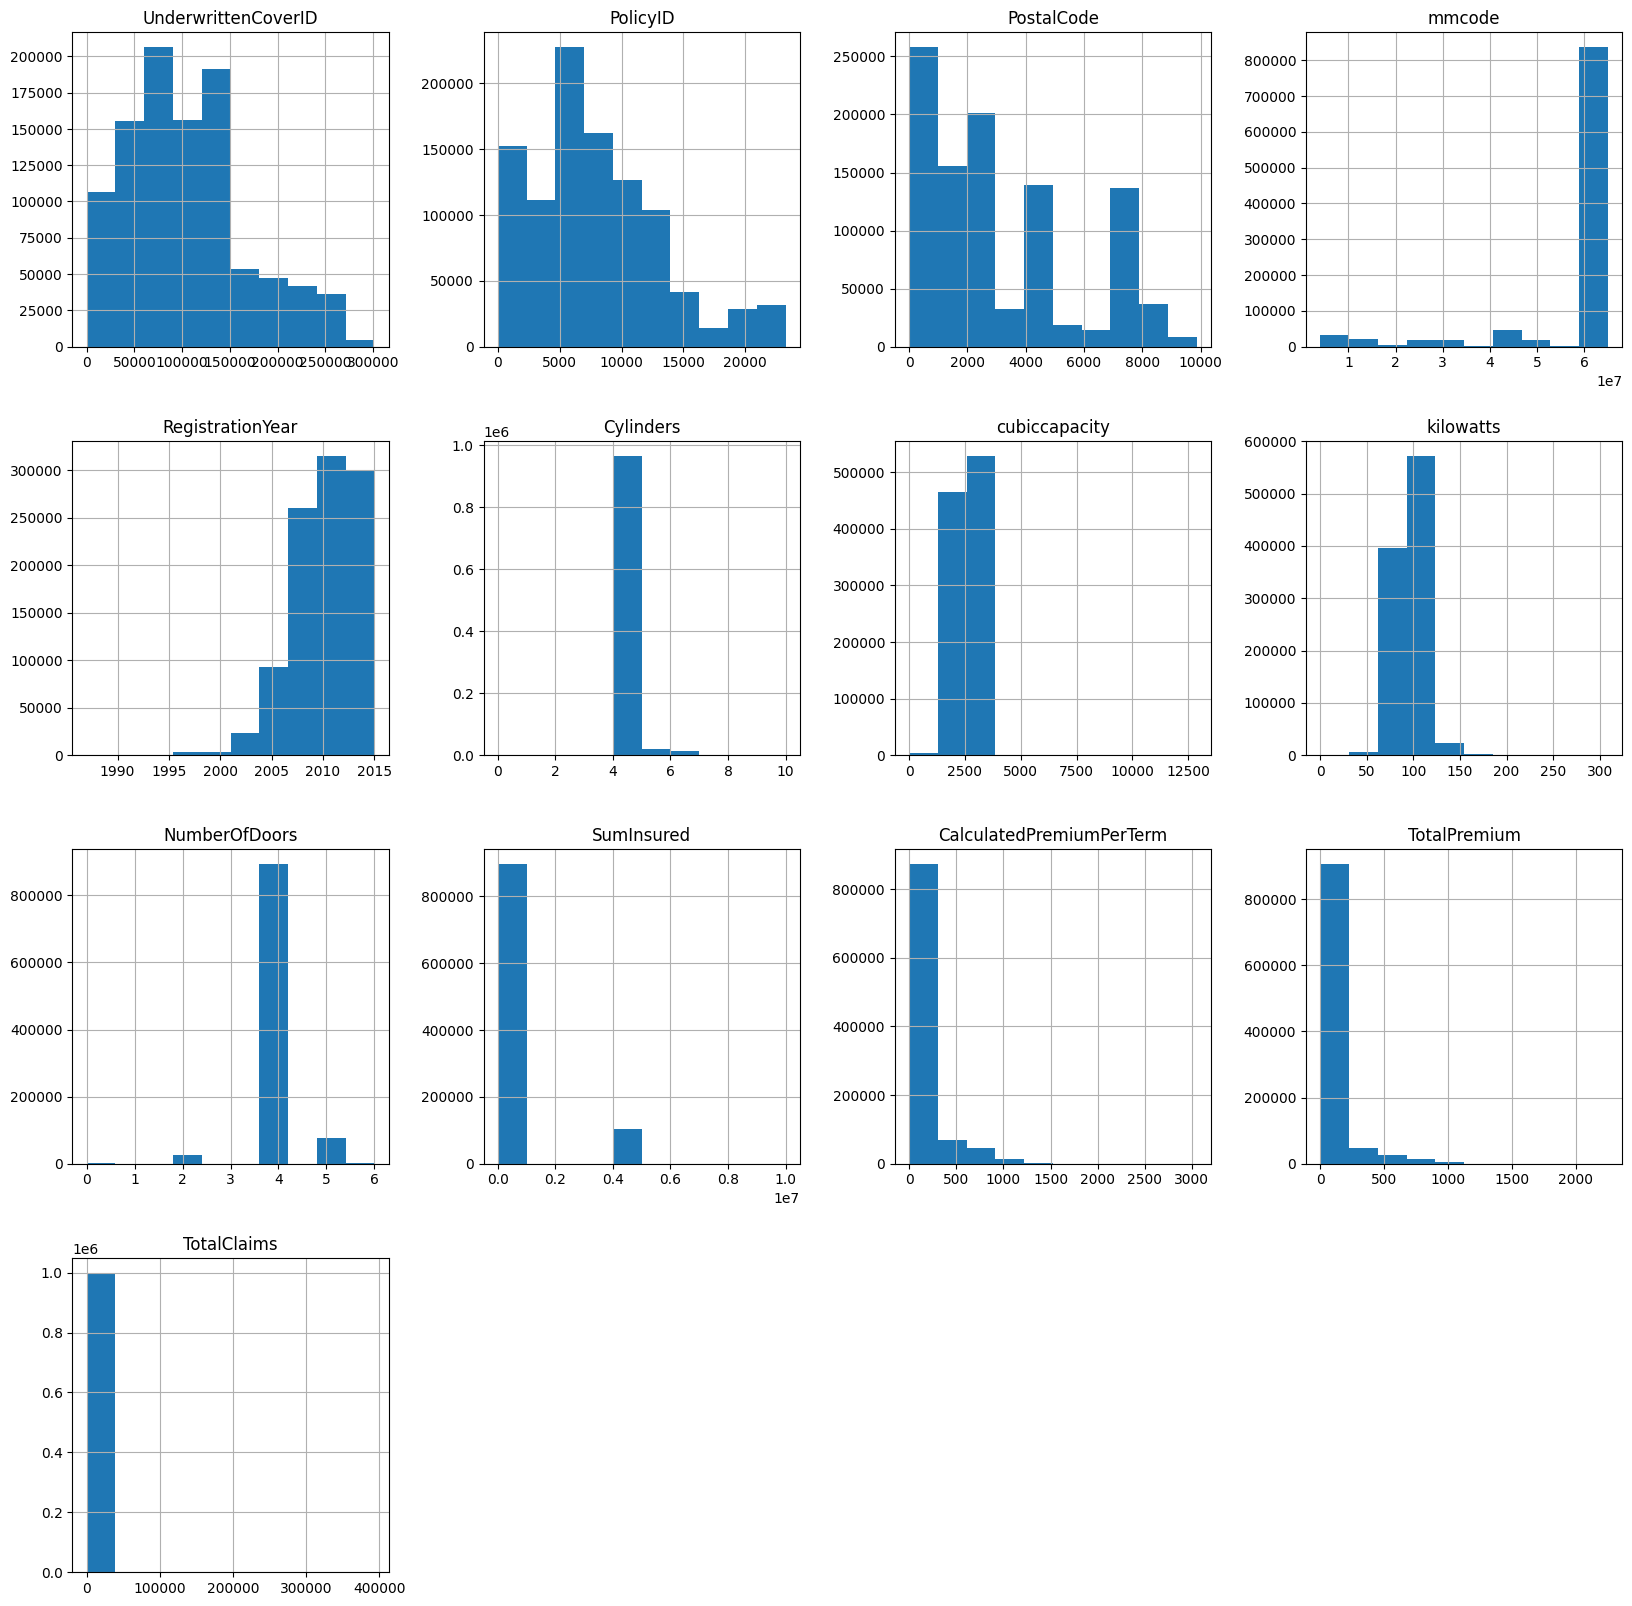

In [24]:
df.hist(figsize=(20, 20))

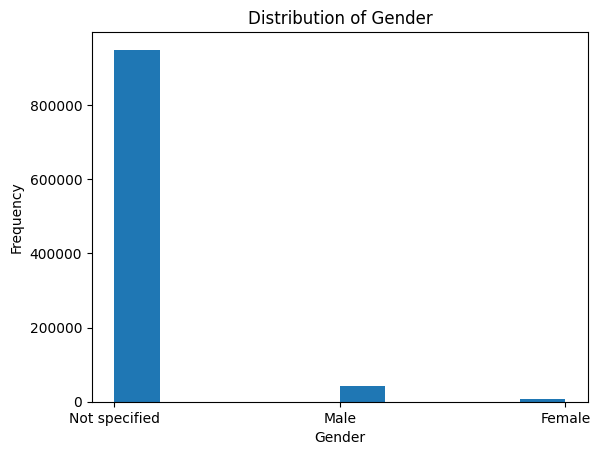

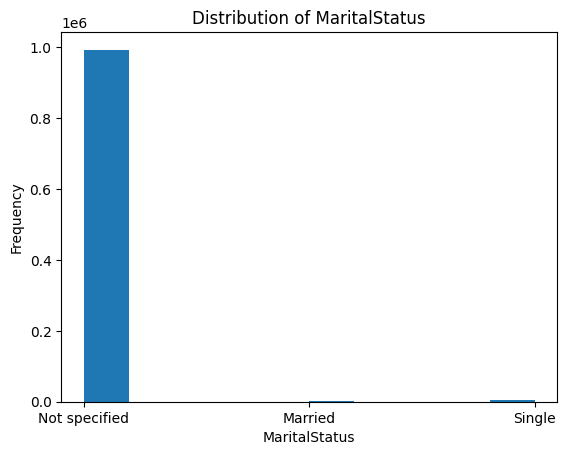

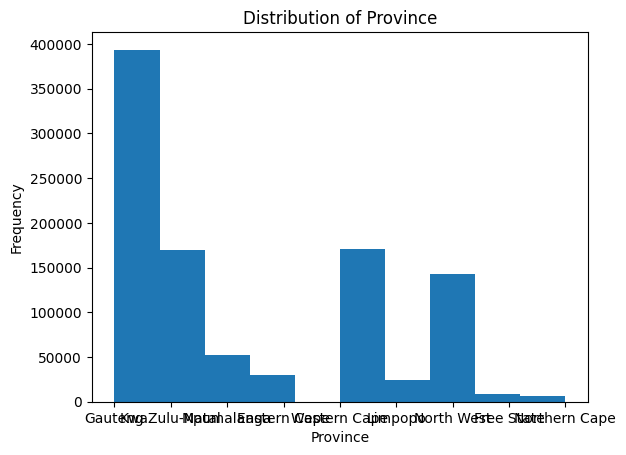

In [25]:
import scripts.plots as plots 
plots = plots.Plots(df)
plots.histogram('Gender')
plots.histogram('MaritalStatus')
plots.histogram('Province')


#### Bivariate Analysis

In [26]:
#ensuring the date is in the correct format
df['TransactionMonth'] = utils.format_date(df['TransactionMonth'])


In [27]:
#sorting the data by province and transaction month
df.sort_values(by=['Province','TransactionMonth'], inplace=True)

Calculating the monthly change in premium and claims

In [28]:
df['PremiumChange'] = df.groupby('Province')['TotalPremium'].diff()
df['ClaimChange'] = df.groupby('Province')['TotalClaims'].diff()
df.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,MaritalStatus,Gender,...,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,PremiumChange,ClaimChange
1000001,31118,402,2015-08-01,False,ZW,Individual,Mr,English,Not specified,Male,...,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,45.486930,0.0,-348.407281,0.0
1000008,31095,402,2015-08-01,False,ZW,Individual,Mr,English,Not specified,Male,...,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,1.308772,0.0,-44.178158,0.0
1000039,31504,389,2015-08-01,False,ZW,Individual,Mr,English,Single,Male,...,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,21.929825,0.0,20.621053,0.0
1000054,31510,389,2015-08-01,False,ZW,Individual,Mr,English,Single,Male,...,Signage and Vehicle Wraps,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,1.557719,0.0,-20.372105,0.0
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,English,Single,Male,...,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0,345.677456,0.0


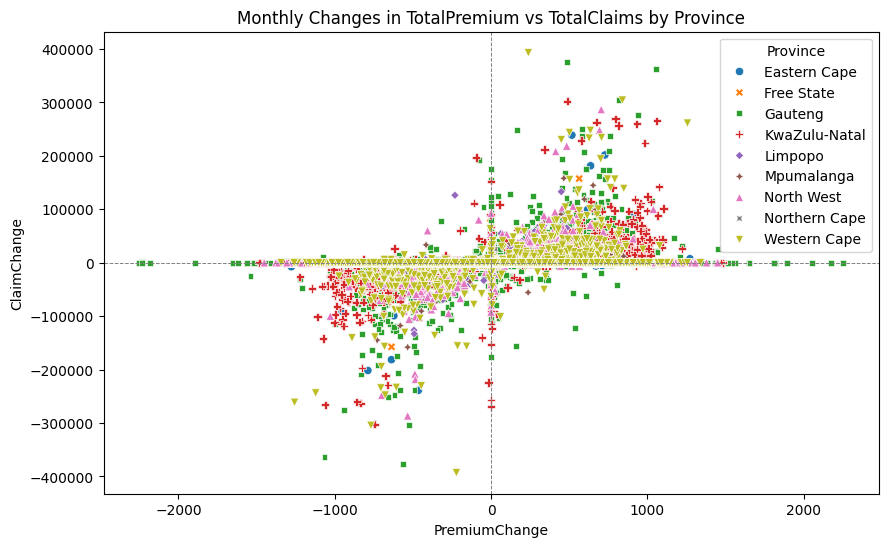

In [29]:
plots.scatter_plot(df, 'PremiumChange', 'ClaimChange', 'Province', 'Monthly Changes in TotalPremium vs TotalClaims by Province')

In [30]:
# gender and TotalPremium
print('Gender and TotalPremium')
df.groupby('Gender')['TotalPremium'].describe()
# # marital status and TotalPremium
# df.groupby('MaritalStatus')['TotalPremium'].describe()
# # province and TotalPremium
# df.groupby('Province')['TotalPremium'].describe()
# # gender and TotalClaims
# df.groupby('Gender')['TotalClaims'].describe()
# # marital status and TotalClaims
# df.groupby('MaritalStatus')['TotalClaims'].describe()
# # province and TotalClaims
# df.groupby('Province')['TotalClaims'].describe()


Gender and TotalPremium


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,6755.0,45.074841,140.912557,0.0,0.0,0.644561,5.198333,1028.579561
Male,42576.0,37.735306,117.465350,0.0,0.0,0.000000,5.583421,934.842281
Not specified,949922.0,62.598336,158.532428,0.0,0.0,2.255965,21.929825,2253.507281


For the columns that are categorical, we will use label encoding. The columns mainly includes 'MaritalStatus', 'Gender' and 'Province'

In [31]:
df.describe()

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims,PremiumChange,ClaimChange
count,999253.000000,999253.000000,999253,999253.000000,9.992530e+05,999253.000000,999253.000000,999253.000000,999253.000000,999253.000000,9.992530e+05,999253.000000,999253.000000,999253.000000,999244.000000,9.992440e+05
mean,104829.875293,7957.823061,2015-02-28 12:19:20.916804608,3019.439475,5.488212e+07,2010.224674,4.046653,2466.737279,97.206250,4.019259,6.038895e+05,116.155039,61.420516,64.377607,0.001502,1.018267e-17
min,1.000000,14.000000,2013-10-01 00:00:00,1.000000,4.041200e+06,1987.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-02,0.000000,0.000000,0.000000,-2253.507281,-3.930921e+05
25%,55150.000000,4500.000000,2015-01-01 00:00:00,812.000000,6.005692e+07,2008.000000,4.000000,2237.000000,75.000000,4.000000,5.000000e+03,3.225700,0.000000,0.000000,-5.216140,0.000000e+00
50%,94087.000000,7071.000000,2015-04-01 00:00:00,2000.000000,6.005842e+07,2011.000000,4.000000,2694.000000,111.000000,4.000000,7.500000e+03,8.436900,2.180175,0.000000,0.000000,0.000000e+00
75%,139193.000000,11079.000000,2015-06-01 00:00:00,4171.000000,6.005842e+07,2013.000000,4.000000,2694.000000,111.000000,4.000000,2.500000e+05,90.000000,21.929825,0.000000,5.820351,0.000000e+00
max,301175.000000,23246.000000,2015-08-01 00:00:00,9870.000000,6.506535e+07,2015.000000,10.000000,12880.000000,309.000000,6.000000,1.000000e+07,3051.821100,2253.507281,393092.105263,2253.507281,3.930921e+05
std,63282.355095,5289.103997,NaN,2649.598272,1.359715e+07,3.261510,0.294058,442.838372,19.394867,0.468374,1.507362e+06,220.573433,156.974271,2369.873974,214.295754,3.350851e+03
